# Exploration der Word2vec Embeddings 20

- ohne Bigramme
- vector_size: 300
- window: 5
- min_count: 1
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v11.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1985', '1986-2000', '2001-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [144]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [145]:
spesso0

{'1700-1750': 0.3755617141723633,
 '1751-1800': 0.48439136147499084,
 '1801-1825': 0.5313302874565125,
 '1826-1850': 0.5783544182777405,
 '1851-1875': 0.49601584672927856,
 '1876-1900': 0.5440003275871277,
 '1901-1925': 0.5301351547241211,
 '1926-1950': 0.4213443994522095,
 '1951-1985': 0.3630225360393524,
 '1986-2000': 0.5193076133728027,
 '2001-2021': 0.5854600071907043}

In [146]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

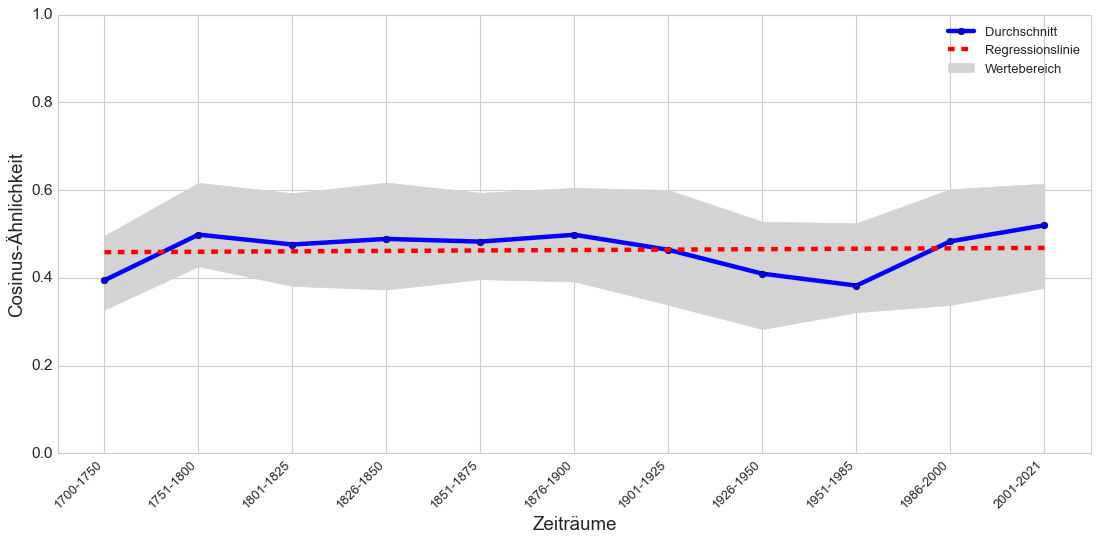

In [147]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [148]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

#domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])
domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [149]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [150]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [151]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [152]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [153]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [154]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [155]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere5 = compare_cos(periods, models, 'essere', 'raccapricciare')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

#essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])
essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])

# Durchschnitt pro Zeitraum
essere_mean = dict(essere_df.mean())

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [156]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere5 = compare_cos(periods, models, 'avere', 'raccapricciare')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

#avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])
avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])

# Durchschnitt pro Zeitraum
avere_mean = dict(avere_df.mean())

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [157]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, 
                                spesso_mean, essere_mean, avere_mean])
control_mean = dict(control_mean_df.mean())

In [158]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, 
                               spesso_min, essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [159]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, 
                               spesso_max, essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

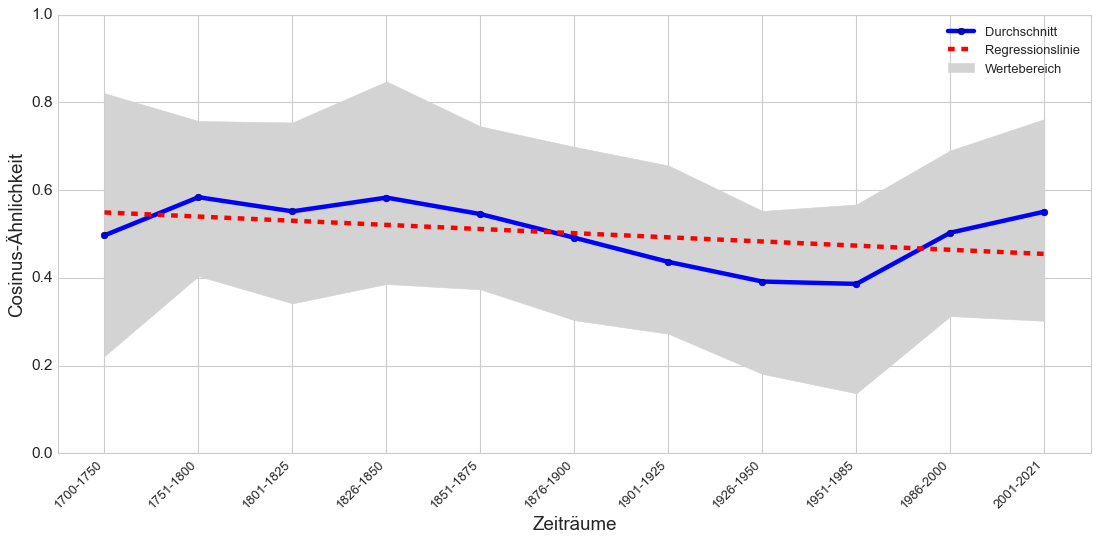

In [160]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [33]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(velasco, 0.9818013906478882)","(punirsi, 0.9869382381439209)","(cospirava, 0.9791890978813171)","(inimicare, 0.9650499820709229)","(tradito, 0.9419642686843872)","(antipatia, 0.8922481536865234)","(onta, 0.8622238039970398)","(represso, 0.8709604144096375)","(purificare, 0.9297286868095398)","(follia, 0.8898653388023376)","(preda, 0.9277735352516174)"
1,"(giulebbe, 0.9806674718856812)","(velarle, 0.9865909814834595)","(sconficcarlo, 0.9781289100646973)","(malcontento, 0.9643022418022156)","(doppiamente, 0.9395468831062317)","(calunnia, 0.8899946808815002)","(espiare, 0.8605998754501343)","(straziare, 0.8631933331489563)","(amfortas, 0.9175124764442444)","(crudele, 0.8856443166732788)","(seminare, 0.9120305776596069)"
2,"(commanda, 0.9803266525268555)","(acqueti, 0.9864587187767029)","(iattanza, 0.9780428409576416)","(vincer, 0.9640071392059326)","(torturare, 0.9394187927246094)","(persecuzione, 0.8886001706123352)","(straziare, 0.859873354434967)","(torturare, 0.8629201650619507)","(sventura, 0.9158006906509399)","(innocente, 0.8855299353599548)","(crudele, 0.9110915064811707)"
3,"(revolta, 0.9802872538566589)","(profonda, 0.9863607287406921)","(ritorti, 0.9775098562240601)","(soddisfatto, 0.9639261364936829)","(vilt, 0.9383503794670105)","(insulto, 0.8872865438461304)","(avvelenare, 0.8594608902931213)","(mentire, 0.8537095785140991)","(gioire, 0.9145427346229553)","(atroce, 0.8841427564620972)","(spavento, 0.9037683010101318)"
4,"(fedeltade, 0.9801809191703796)","(agili, 0.985801100730896)","(affretterari, 0.9767351746559143)","(astretto, 0.9626071453094482)","(disdegno, 0.937126100063324)","(reciproco, 0.8834795951843262)","(martirio, 0.8493143320083618)","(sventura, 0.8446887731552124)","(fantasticare, 0.9121949076652527)","(orrendo, 0.883587658405304)","(sgomento, 0.9006048440933228)"
5,"(scherzai, 0.9794220328330994)","(rioda, 0.9856517314910889)","(difendendosi, 0.9761137366294861)","(magnificare, 0.9624398350715637)","(ingrato, 0.9361821413040161)","(ostentare, 0.8809939622879028)","(materno, 0.8462609052658081)","(prorompere, 0.8423548340797424)","(smarrito, 0.9118754863739014)","(crudeltà, 0.8821287751197815)","(disperazione, 0.8998988270759583)"
6,"(agitabant, 0.9794124960899353)","(amonizion, 0.9855890274047852)","(sacrificar, 0.9755915999412537)","(ostinatamente, 0.9613476395606995)","(rammaricare, 0.9357738494873047)","(persuasione, 0.8809734582901001)","(infliggere, 0.8459665775299072)","(perdutamente, 0.8420343399047852)","(mariola, 0.9098405241966248)","(odiare, 0.8808685541152954)","(atroce, 0.8981823921203613)"
7,"(ricopiare, 0.9793598651885986)","(stampar, 0.9855039715766907)","(pietruccio, 0.9754677414894104)","(ciecamente, 0.96114581823349)","(disillusione, 0.9328792691230774)","(ciecamente, 0.8801458477973938)","(rassegnazione, 0.8400705456733704)","(sgridare, 0.8417297005653381)","(admeto, 0.9076207280158997)","(tortura, 0.8772678375244141)","(dolore, 0.8974023461341858)"
8,"(vedovare, 0.9790022969245911)","(diuturno, 0.985434353351593)","(spregio, 0.9749708771705627)","(ingiustamente, 0.9606888294219971)","(rimpianto, 0.9323583245277405)","(formulare, 0.8800917267799377)","(disprezzare, 0.8391118049621582)","(sanare, 0.8397332429885864)","(peccatore, 0.9073648452758789)","(tremendo, 0.8736637830734253)","(stomaco, 0.8946103453636169)"
9,"(evoè, 0.9789912700653076)","(adipe, 0.985400378704071)","(volonterosamente, 0.9746894240379333)","(lodarsi, 0.9604012966156006)","(stizza, 0.9323568940162659)","(severamente, 0.8792994618415833)","(vendetta, 0.8375588655471802)","(gioire, 0.8396249413490295)","(malo, 0.9044339060783386)","(sete, 0.8691897988319397)","(mutilare, 0.8938896059989929)"


In [34]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.4656274616718292,
 '1751-1800': 0.567929208278656,
 '1801-1825': 0.5219866633415222,
 '1826-1850': 0.5590800046920776,
 '1851-1875': 0.5931742191314697,
 '1876-1900': 0.6265910863876343,
 '1901-1925': 0.48080113530158997,
 '1926-1950': 0.3962252736091614,
 '1951-1985': 0.45064637064933777,
 '1986-2000': 0.4715845584869385,
 '2001-2021': 0.5061728358268738}

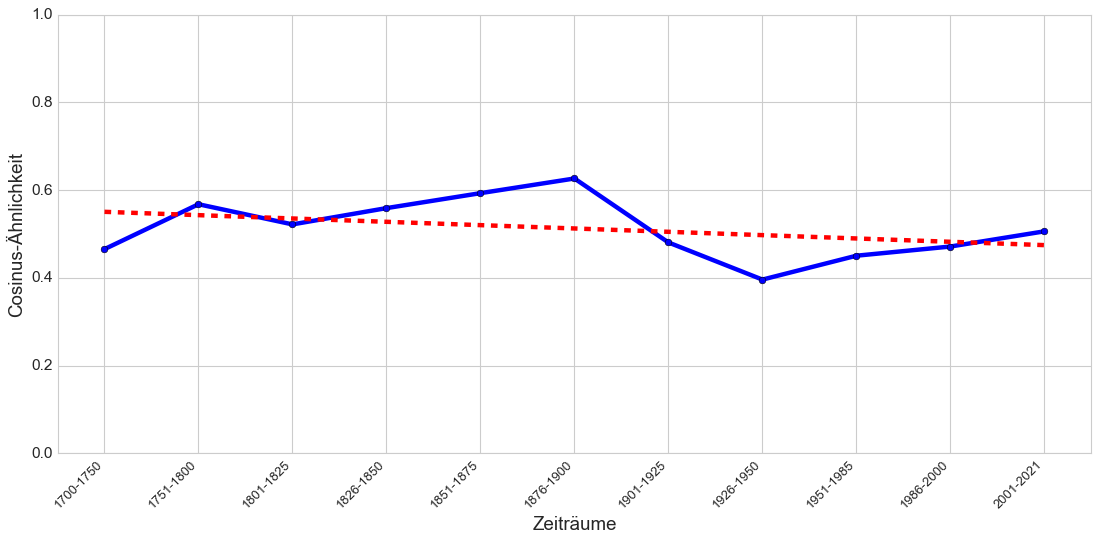

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

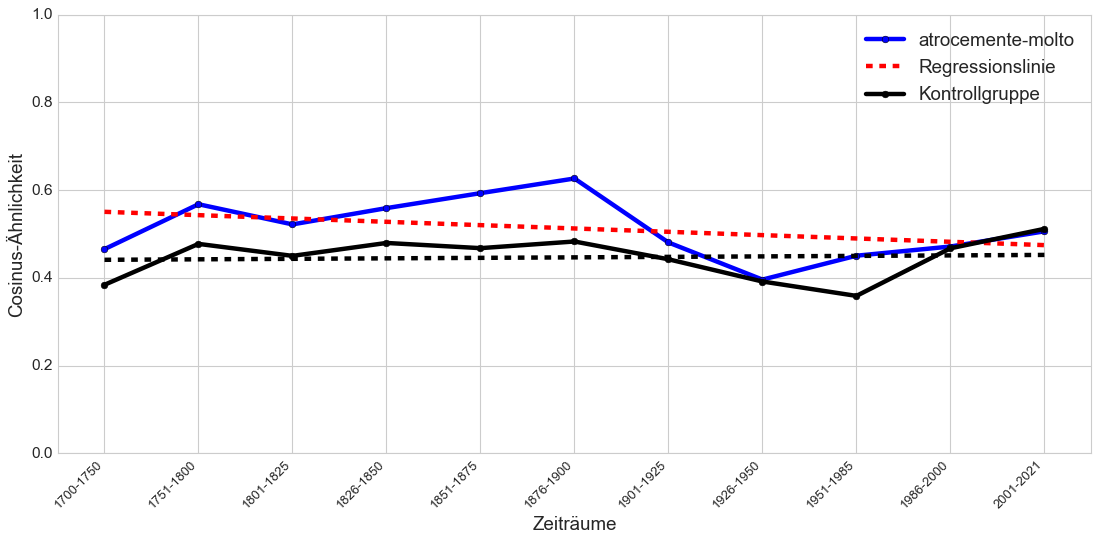

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [37]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [38]:
atrocemente1

{'1700-1750': 0.7992440462112427,
 '1751-1800': 0.7205724716186523,
 '1801-1825': 0.7173539400100708,
 '1826-1850': 0.7711666822433472,
 '1851-1875': 0.7936627864837646,
 '1876-1900': 0.7279653549194336,
 '1901-1925': 0.676388680934906,
 '1926-1950': 0.6637087464332581,
 '1951-1985': 0.7192972898483276,
 '1986-2000': 0.7768350839614868,
 '2001-2021': 0.866064190864563}

In [39]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

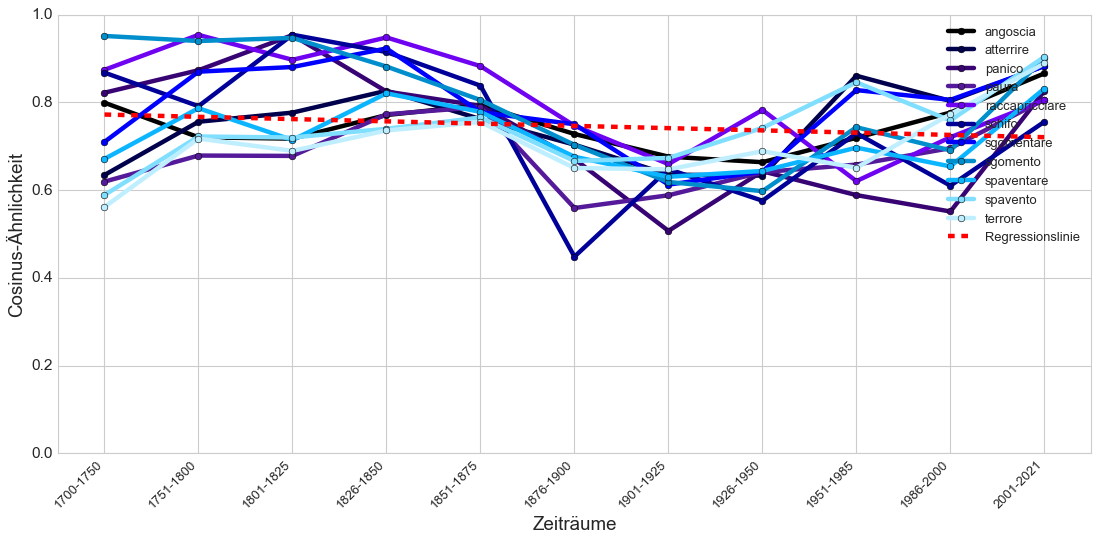

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

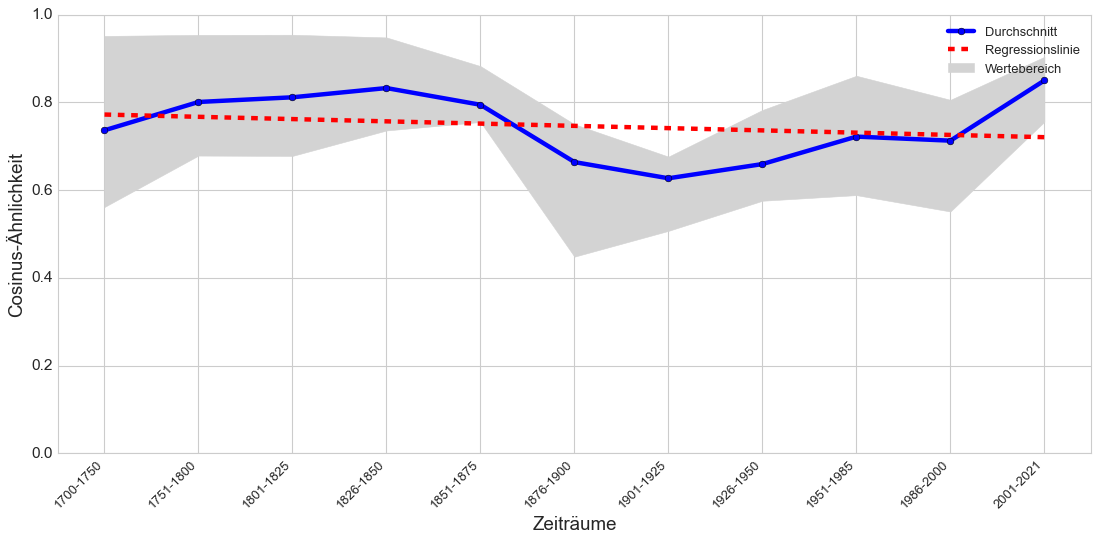

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

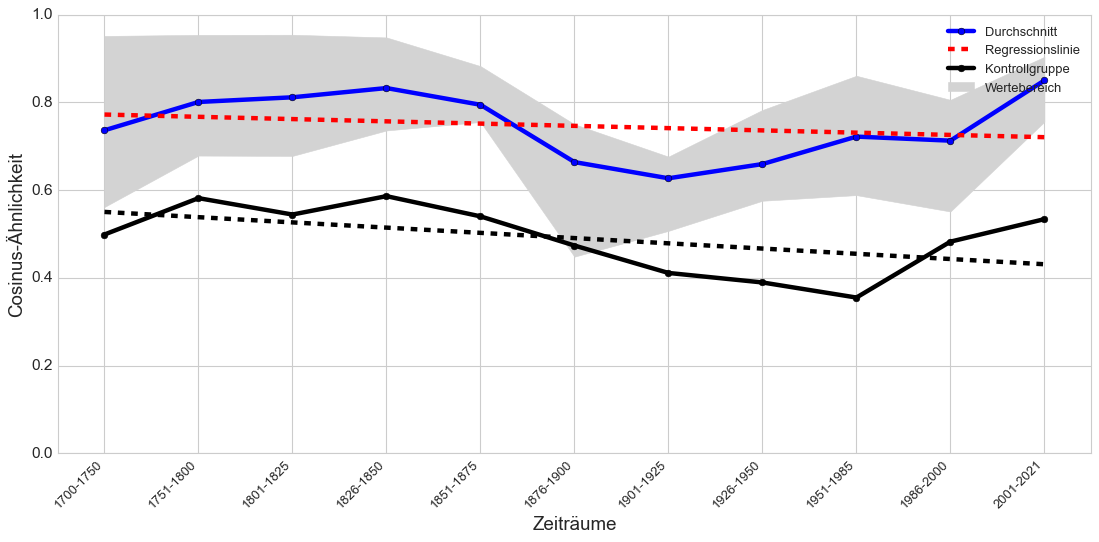

In [42]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [43]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,not in vocab,not in vocab,"(multare, 0.9878022074699402)","(balsamico, 0.9722646474838257)","(tronc, 0.9525665044784546)","(bitorzoli, 0.9651347994804382)","(positivistica, 0.9723148345947266)","(celti, 0.9818741083145142)","(incarnare, 0.9015018343925476)"
1,not in vocab,not in vocab,not in vocab,not in vocab,"(residuale, 0.9874638915061951)","(lodor, 0.9680057168006897)","(fragoroso, 0.9491733312606812)","(pezzuola, 0.9627244472503662)","(menomare, 0.9700237512588501)","(stanziale, 0.9815715551376343)","(immaginazione, 0.8958253264427185)"
2,not in vocab,not in vocab,not in vocab,not in vocab,"(cittadini, 0.9867090582847595)","(piantarli, 0.966690719127655)","(barriti, 0.9478049874305725)","(ispido, 0.9622759222984314)","(constatabili, 0.9697928428649902)","(irreligiosa, 0.9809615612030029)","(ignoranza, 0.8951770067214966)"
3,not in vocab,not in vocab,not in vocab,not in vocab,"(occhieggiarsi, 0.9857608079910278)","(obligati, 0.9662986397743225)","(sonaglioli, 0.9444305896759033)","(rossiccia, 0.9615193605422974)","(esplicazione, 0.9697331786155701)","(occidentalizzazione, 0.9808899760246277)","(essenza, 0.8938359022140503)"
4,not in vocab,not in vocab,not in vocab,not in vocab,"(lucci, 0.9856907725334167)","(rifarvi, 0.9652038812637329)","(rotolìo, 0.9441295266151428)","(ciondolante, 0.9605746865272522)","(supplire, 0.969193696975708)","(luard, 0.9804483652114868)","(radice, 0.8938060402870178)"
5,not in vocab,not in vocab,not in vocab,not in vocab,"(picciolissimo, 0.9852871298789978)","(sontuosità, 0.9645122289657593)","(barrito, 0.9440189003944397)","(solino, 0.9601721167564392)","(dettame, 0.9690229892730713)","(shin, 0.9801110625267029)","(interiore, 0.8921898007392883)"
6,not in vocab,not in vocab,not in vocab,not in vocab,"(solone, 0.9852861762046814)","(guastandosi, 0.9644446969032288)","(locomotiva, 0.9438485503196716)","(impaurita, 0.9599953293800354)","(riordinamento, 0.9686043858528137)","(sacharov, 0.9798877835273743)","(mento, 0.8911370635032654)"
7,not in vocab,not in vocab,not in vocab,not in vocab,"(sorridesti, 0.9852422475814819)","(nevischio, 0.9642959237098694)","(slanci, 0.9437528252601624)","(feltro, 0.9590871930122375)","(variabilità, 0.9685578346252441)","(ripudio, 0.9798288345336914)","(universo, 0.8907832503318787)"
8,not in vocab,not in vocab,not in vocab,not in vocab,"(limosine, 0.9851237535476685)","(spacco, 0.9641879200935364)","(termini, 0.9431853890419006)","(insaccare, 0.9589155316352844)","(limitativo, 0.9682505130767822)","(preconfezionati, 0.9797981977462769)","(leggerezza, 0.8896505236625671)"
9,not in vocab,not in vocab,not in vocab,not in vocab,"(orifiamma, 0.9850756525993347)","(spinare, 0.9638592004776001)","(carrozzone, 0.9431180953979492)","(rientrante, 0.9587302207946777)","(psicofisico, 0.968219518661499)","(transfert, 0.9793874025344849)","(spiritualità, 0.8874394297599792)"


In [44]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1851-1875': 0.5549054741859436,
 '1876-1900': 0.5752948522567749,
 '1901-1925': 0.5231121778488159,
 '1926-1950': 0.4004691541194916,
 '1951-1985': 0.552544355392456,
 '1986-2000': 0.5320069789886475,
 '2001-2021': 0.5805061459541321}

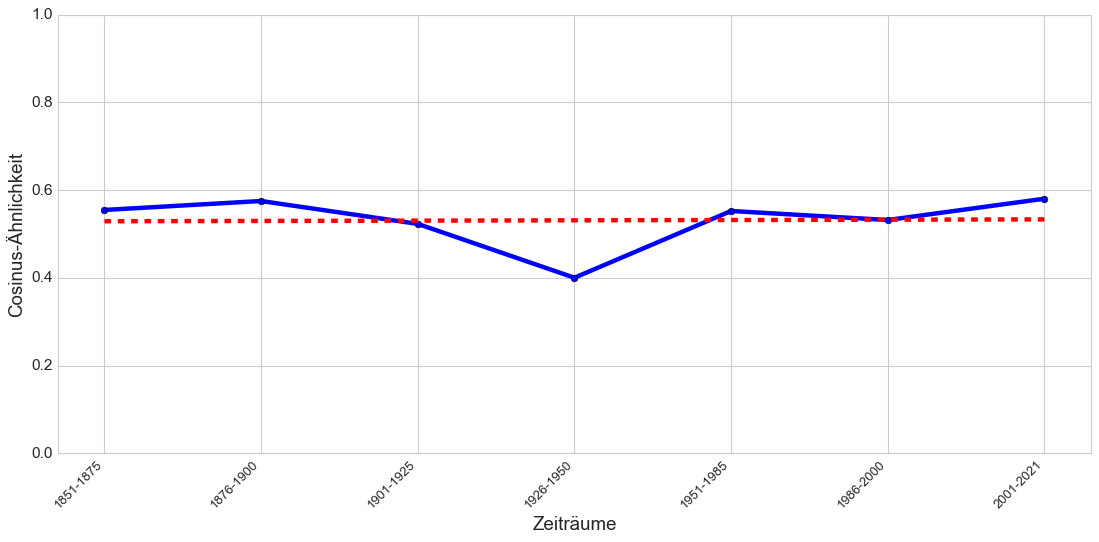

In [45]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [46]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [47]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

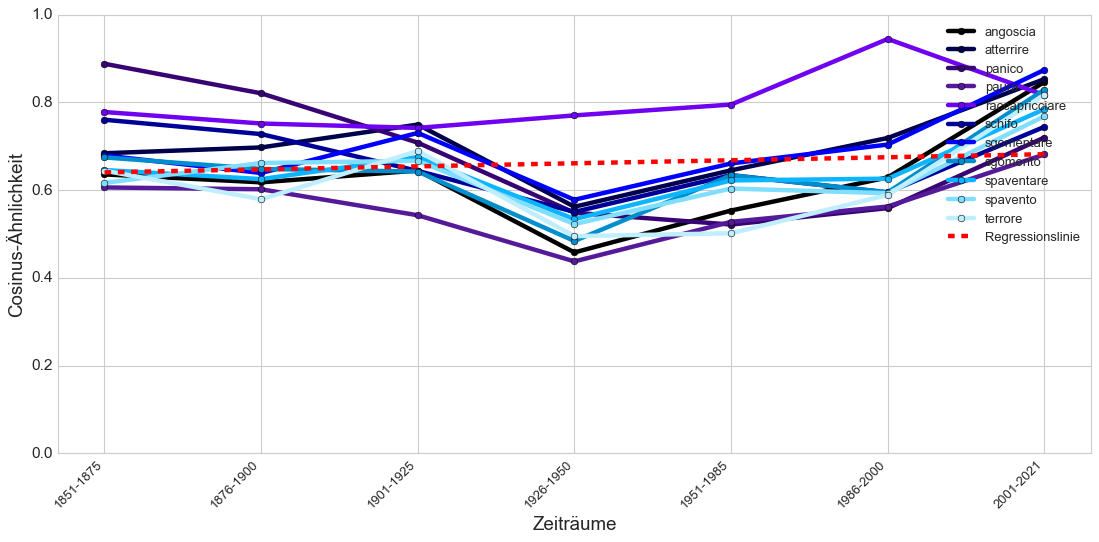

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

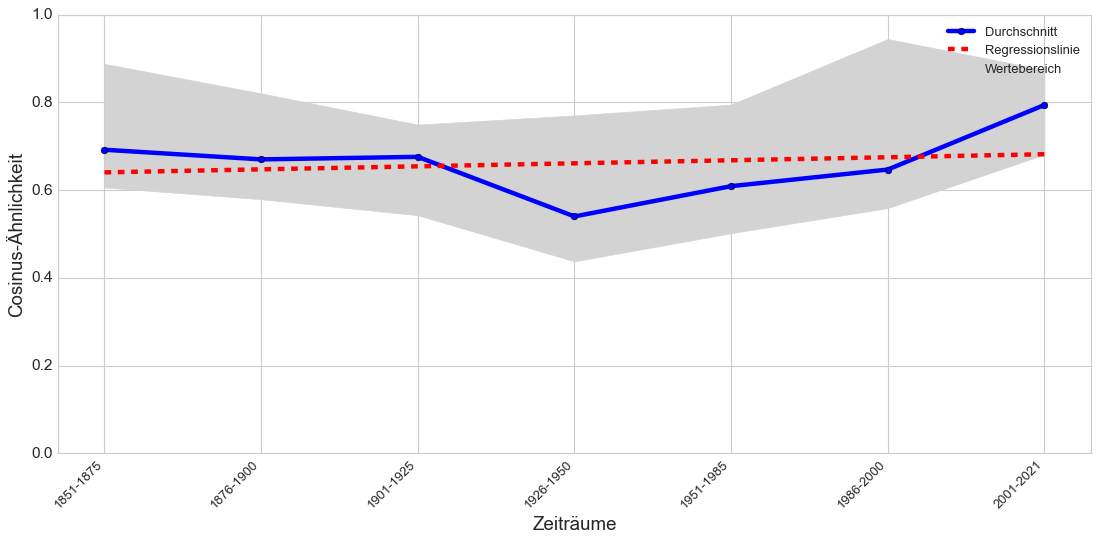

In [49]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [50]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(deformare, 0.9835822582244873)",not in vocab,"(dittinna, 0.9891053438186646)",not in vocab,"(sejano, 0.9672379493713379)","(sitibonda, 0.9826139807701111)","(emanare, 0.927563488483429)","(stravolto, 0.8938036561012268)","(inconsistente, 0.9462708830833435)","(spaventosamente, 0.9321308732032776)","(tremendamente, 0.920763373374939)"
1,"(scemò, 0.9786689281463623)",not in vocab,"(inesausta, 0.9869040846824646)",not in vocab,"(conturbare, 0.9666920900344849)","(appagato, 0.9771448373794556)","(sovrumano, 0.9220374822616577)","(strappo, 0.8889973759651184)","(decorativismo, 0.9359334707260132)","(moltitudine, 0.8892223834991455)","(sfumatura, 0.908948540687561)"
2,"(eccitante, 0.9781386256217957)",not in vocab,"(lionessa, 0.9867890477180481)",not in vocab,"(addolcire, 0.9647768139839172)","(offuscamento, 0.9769123792648315)","(smisurato, 0.9196780920028687)","(irriconoscibile, 0.8780725002288818)","(enormemente, 0.9338738918304443)","(agile, 0.888974666595459)","(terribilmente, 0.9010671973228455)"
3,"(sopite, 0.9776555895805359)",not in vocab,"(fetente, 0.9865792393684387)",not in vocab,"(funestare, 0.9638134241104126)","(condensato, 0.9753700494766235)","(lavorio, 0.9194619059562683)","(statuario, 0.8744589686393738)","(scarseggia, 0.9297659397125244)","(infinitamente, 0.8871141672134399)","(essenza, 0.8943775296211243)"
4,"(caracca, 0.9776256680488586)",not in vocab,"(quotidie, 0.9865702986717224)",not in vocab,"(temessi, 0.9637462496757507)","(scomparisca, 0.9748631119728088)","(magnetico, 0.9182437658309937)","(ruga, 0.8718223571777344)","(durevole, 0.9297640919685364)","(insopportabile, 0.8853803277015686)","(crudo, 0.8888980150222778)"
5,"(anglia, 0.9772209525108337)",not in vocab,"(sandalo, 0.9864609837532043)",not in vocab,"(timidezza, 0.9633409976959229)","(conquistarselo, 0.9747703671455383)","(istantaneo, 0.9177217483520508)","(vitreo, 0.8697243928909302)","(acrobatismo, 0.9294800758361816)","(pigro, 0.8813904523849487)","(pallido, 0.886971652507782)"
6,"(disugualetante, 0.9769688844680786)",not in vocab,"(sfrenati, 0.9862564206123352)",not in vocab,"(ritrosia, 0.9629348516464233)","(austerit, 0.9745832681655884)","(penetrante, 0.9173610210418701)","(appesantire, 0.8680346608161926)","(attutire, 0.9289441108703613)","(perfezione, 0.8788446187973022)","(leggerezza, 0.8831812739372253)"
7,"(infieriti, 0.9767781496047974)",not in vocab,"(sussuro, 0.9861980676651001)",not in vocab,"(avverare, 0.9628322720527649)","(torturato, 0.9744389653205872)","(sensualità, 0.9148104190826416)","(pieghevole, 0.8679412007331848)","(fatalismo, 0.928586483001709)","(solare, 0.8782283663749695)","(palato, 0.8814747333526611)"
8,"(annunzian, 0.9760679602622986)",not in vocab,"(abbruciacchiare, 0.9860234260559082)",not in vocab,"(scrutare, 0.9626547694206238)","(pelandi, 0.9743394255638123)","(sensibilità, 0.9145073294639587)","(intensamente, 0.8677704334259033)","(autoritratto, 0.9275109171867371)","(lontananza, 0.8782036900520325)","(metafora, 0.8803622722625732)"
9,"(previeni, 0.9758909344673157)",not in vocab,"(madri, 0.9859210252761841)",not in vocab,"(disappunto, 0.9610970616340637)","(oppresse, 0.9734106063842773)","(prodigioso, 0.9138539433479309)","(ruvido, 0.8668680787086487)","(appieno, 0.9274836778640747)","(semplicità, 0.8778473734855652)","(trama, 0.8796109557151794)"


In [51]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.4602848291397095,
 '1801-1825': 0.48081159591674805,
 '1851-1875': 0.5964704751968384,
 '1876-1900': 0.5449471473693848,
 '1901-1925': 0.5882895588874817,
 '1926-1950': 0.47692033648490906,
 '1951-1985': 0.586749792098999,
 '1986-2000': 0.6603390574455261,
 '2001-2021': 0.6698883175849915}

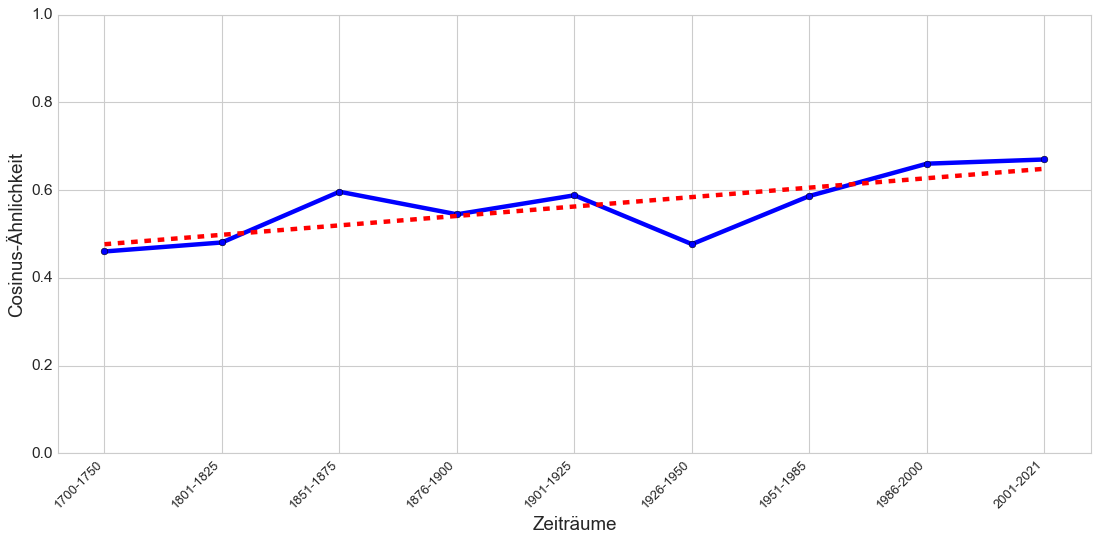

In [52]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [53]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [54]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

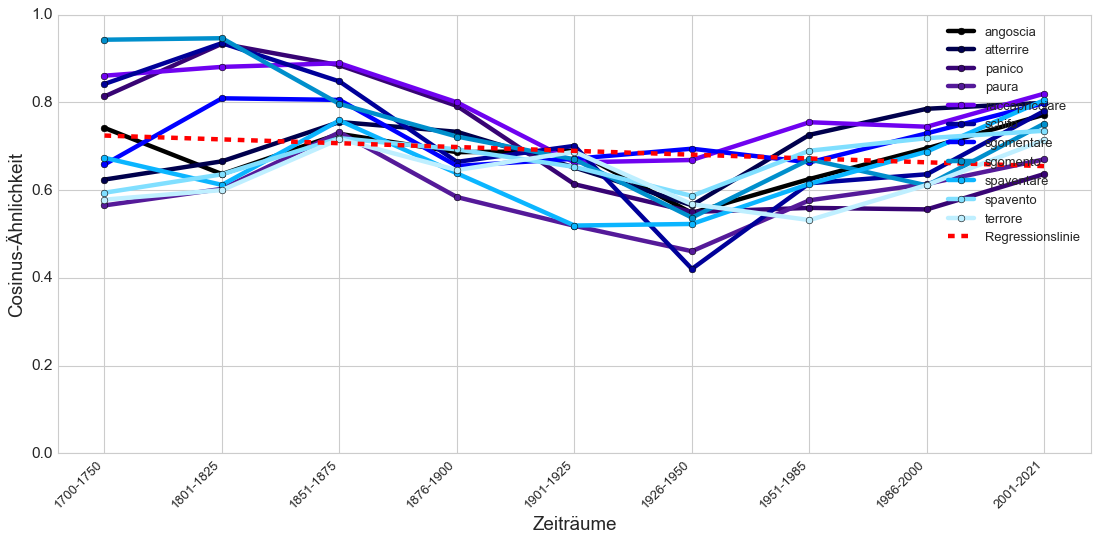

In [55]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

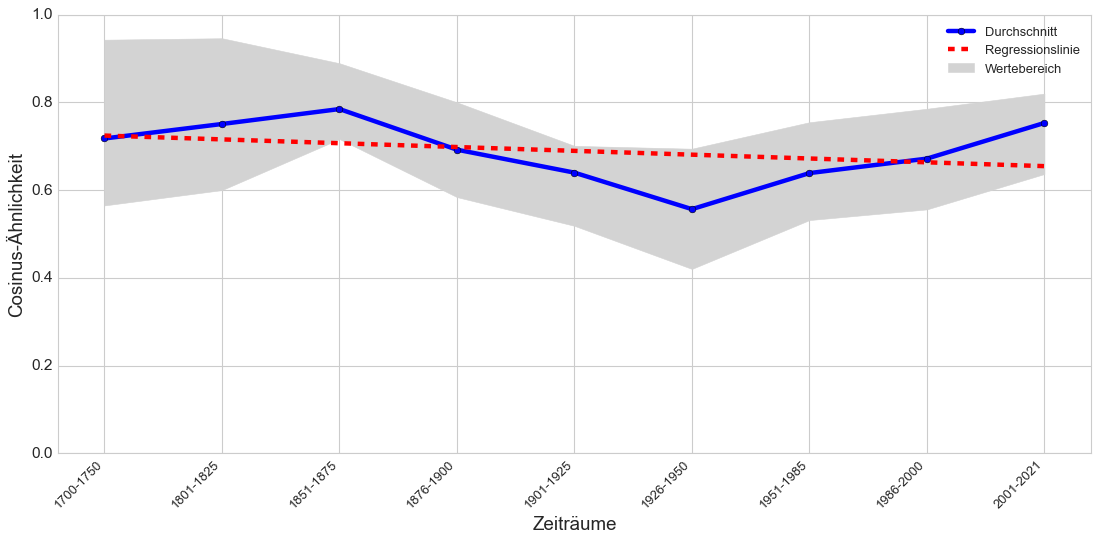

In [56]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [57]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(fidius, 0.9865404367446899)","(occhiuto, 0.9773673415184021)","(nugolo, 0.9760565161705017)","(spezz, 0.9849022626876831)","(diafano, 0.9655700325965881)","(arrossare, 0.92081218957901)","(fulminato, 0.9229846596717834)","(criniera, 0.9168791770935059)","(straziato, 0.939711332321167)","(mutilare, 0.937698245048523)","(orribilmente, 0.9500381350517273)"
1,"(lavarlo, 0.9860431551933289)","(auretta, 0.9772994518280029)","(cute, 0.9702080488204956)","(incrocicchiando, 0.9823395609855652)","(trasparenza, 0.9650309681892395)","(abbeverare, 0.9130155444145203)","(rovente, 0.9085242748260498)","(inanellare, 0.9162187576293945)","(silenziosamente, 0.9355208277702332)","(sfigurato, 0.9041704535484314)","(mutilare, 0.9151387214660645)"
2,"(egizia, 0.9849108457565308)","(lasciartel, 0.9771841764450073)","(scote, 0.9700834155082703)","(inalberar, 0.9814229011535645)","(sfavillare, 0.9636659622192383)","(imporporare, 0.9095993638038635)","(felino, 0.906181275844574)","(rugoso, 0.915080189704895)","(imbrattare, 0.9312834143638611)","(orribilmente, 0.9018409848213196)","(giacere, 0.8983842134475708)"
3,"(abbigliato, 0.9847779273986816)","(fro, 0.9764299988746643)","(ritragge, 0.9691210985183716)","(usciale, 0.9809200167655945)","(bianchezza, 0.9634472131729126)","(macilento, 0.9088586568832397)","(leccare, 0.9052954316139221)","(inarcare, 0.9125517010688782)","(pucci, 0.9296419024467468)","(proiettile, 0.8949662446975708)","(atrocemente, 0.8855417966842651)"
4,"(accarezzar, 0.984651505947113)","(latmo, 0.9760249853134155)","(allontanossi, 0.9685653448104858)","(festante, 0.9805293679237366)","(madido, 0.9633418917655945)","(asma, 0.9073798656463623)","(spaccare, 0.9044758677482605)","(accaldato, 0.9111318588256836)","(impigliare, 0.9287837147712708)","(sfigurare, 0.8905704021453857)","(avvolgere, 0.8714632391929626)"
5,"(cadersi, 0.9845590591430664)","(accese, 0.9760118126869202)","(spezzato, 0.9679849743843079)","(atterriamolo, 0.9803876876831055)","(aggrottate, 0.9625461101531982)","(impassibilità, 0.9073343873023987)","(ruggiva, 0.9043278098106384)","(turgido, 0.9105968475341797)","(plico, 0.9285455942153931)","(cadavere, 0.8847984671592712)","(orrore, 0.8648416996002197)"
6,"(rapirle, 0.9844385385513306)","(stremare, 0.975954532623291)","(fracassare, 0.9679228663444519)","(vittrice, 0.980122983455658)","(soffuso, 0.9621833562850952)","(inutil, 0.9069765210151672)","(cranio, 0.8991438150405884)","(appesantire, 0.9082959294319153)","(east, 0.9277008175849915)","(passante, 0.8787149786949158)","(tunica, 0.8642711043357849)"
7,"(aprano, 0.9844359755516052)","(ricciuto, 0.9758543372154236)","(squassare, 0.965994656085968)","(estranie, 0.979865550994873)","(cadaverico, 0.9619099497795105)","(gabbiano, 0.9061678051948547)","(fracassare, 0.8986032009124756)","(dimenare, 0.9075433611869812)","(frastuomo, 0.9264468550682068)","(ferire, 0.8759509921073914)","(pianto, 0.8608464598655701)"
8,"(drappi, 0.9843437075614929)","(trabalza, 0.9757346510887146)","(ocean, 0.9657546281814575)","(fortissim, 0.9797590970993042)","(incavato, 0.9616320133209229)","(tergere, 0.9061281681060791)","(vomitare, 0.8981202840805054)","(conficcare, 0.9066360592842102)","(malcolm, 0.9254329204559326)","(violentare, 0.8735461235046387)","(cieco, 0.8593021631240845)"
9,"(fremerà, 0.984322726726532)","(strepitanti, 0.9755117297172546)","(sibilare, 0.9655550122261047)","(erebo, 0.9791662096977234)","(dilatato, 0.9610745906829834)","(consunto, 0.9055298566818237)","(brancicare, 0.8967429399490356)","(muscoloso, 0.9066222906112671)","(bisticciare, 0.9252471327781677)","(dilaniare, 0.8697035908699036)","(sudore, 0.8572766184806824)"


In [58]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1700-1750': 0.4724699854850769,
 '1751-1800': 0.46622660756111145,
 '1801-1825': 0.47218284010887146,
 '1826-1850': 0.4736118018627167,
 '1851-1875': 0.4439917206764221,
 '1876-1900': 0.5170590877532959,
 '1901-1925': 0.4118190407752991,
 '1926-1950': 0.3449745178222656,
 '1951-1985': 0.43690797686576843,
 '1986-2000': 0.3466578722000122,
 '2001-2021': 0.4278372824192047}

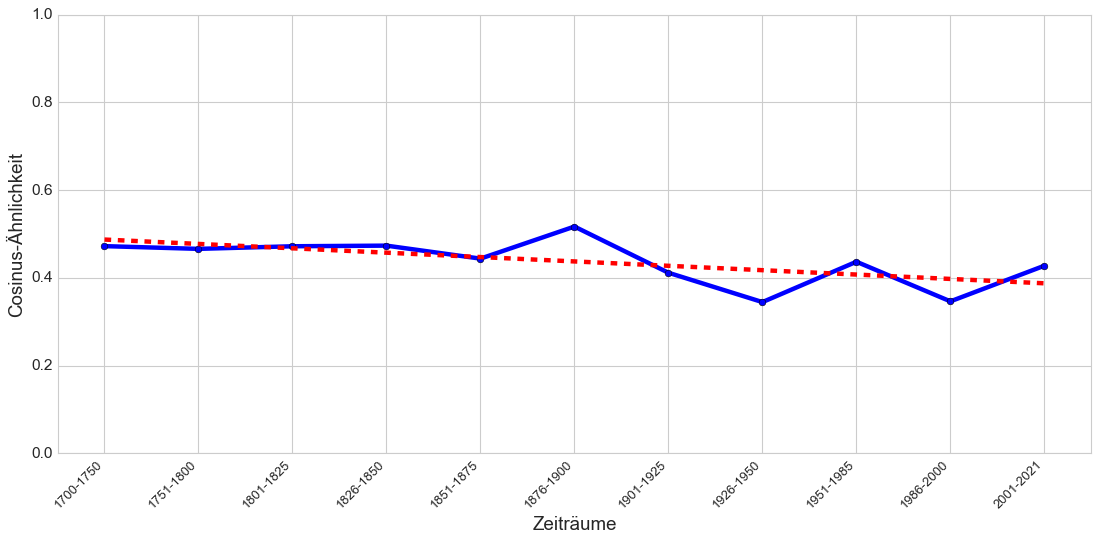

In [59]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [60]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [61]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

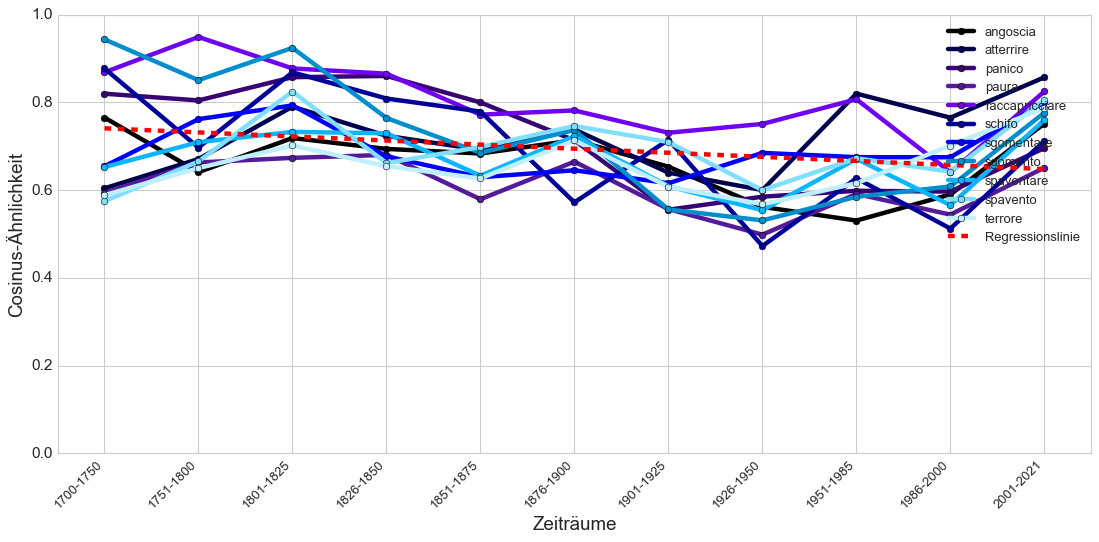

In [62]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

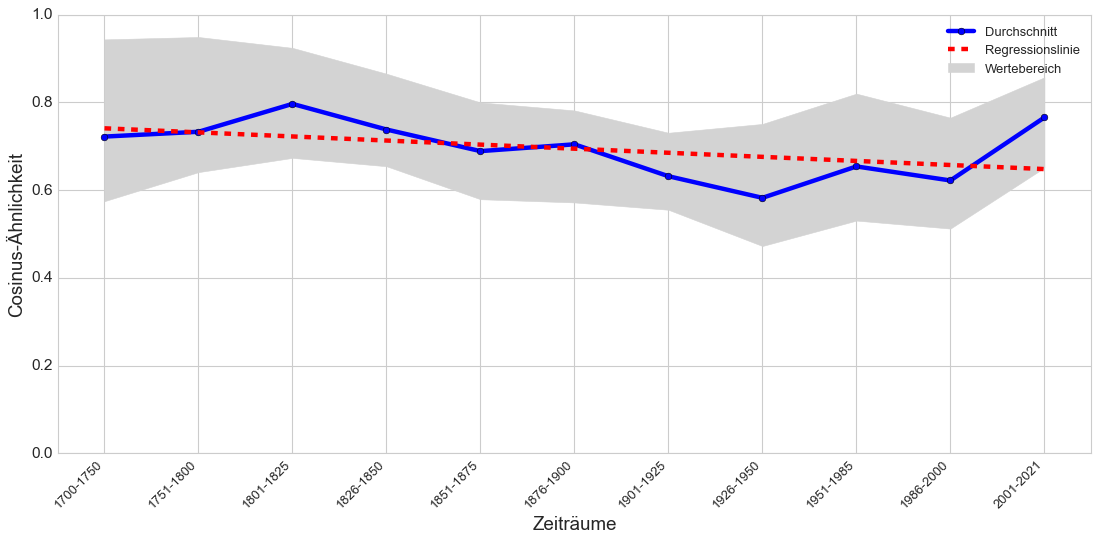

In [63]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [64]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(sultan, 0.9200505614280701)","(flutto, 0.9506789445877075)","(fremito, 0.9422698616981506)","(scoglio, 0.9452332854270935)","(livido, 0.918510377407074)","(percuotere, 0.800226628780365)","(orrendamente, 0.7900398373603821)","(straziare, 0.7720520496368408)","(pecora, 0.8677420616149902)","(mutilare, 0.9267402291297913)","(orrendamente, 0.9500381946563721)"
1,"(aquilonar, 0.9184778332710266)","(semivivo, 0.9496813416481018)","(terribil, 0.9340158700942993)","(traversare, 0.9426392316818237)","(pallore, 0.9100273251533508)","(martellare, 0.7862414121627808)","(rovente, 0.7851463556289673)","(orrendo, 0.7686184644699097)","(lupo, 0.8671727180480957)","(sfigurato, 0.9102048873901367)","(mutilare, 0.9418343901634216)"
2,"(fremea, 0.9129525423049927)","(procelloso, 0.9492406845092773)","(orlo, 0.9336050152778625)","(coperto, 0.9420140385627747)","(gonfio, 0.908595621585846)","(percossa, 0.7850933074951172)","(dilaniare, 0.7786999940872192)","(vile, 0.7673367261886597)","(sudore, 0.8660569190979004)","(sfigurare, 0.9080064296722412)","(giacere, 0.9020272493362427)"
3,"(aquilone, 0.9119299650192261)","(taciturno, 0.9471714496612549)","(sofferse, 0.9322152733802795)","(cintare, 0.9392603635787964)","(palpebra, 0.9079745411872864)","(furibondo, 0.7843434810638428)","(viscere, 0.7764975428581238)","(poverina, 0.7626159191131592)","(agonizzare, 0.862928032875061)","(irriconoscibile, 0.9018901586532593)","(atrocemente, 0.8920568227767944)"
4,"(prora, 0.9090511798858643)","(solco, 0.9448336362838745)","(ghiaccio, 0.9291473627090454)","(lido, 0.9374558925628662)","(contrazione, 0.8992723822593689)","(macilento, 0.7842853665351868)","(mortalmente, 0.7748755216598511)","(terribilmente, 0.7597749829292297)","(ubriaco, 0.8590061664581299)","(orrendamente, 0.9018409848213196)","(avvolgere, 0.8863435983657837)"
5,"(attorte, 0.9082916975021362)","(cintare, 0.94392991065979)","(adagiare, 0.929099440574646)","(canna, 0.9372545480728149)","(guancie, 0.8984528183937073)","(sfinire, 0.7823511958122253)","(tremante, 0.7736472487449646)","(sofferente, 0.7595377564430237)","(succhiare, 0.8585971593856812)","(straziare, 0.9001305103302002)","(orrore, 0.8844649195671082)"
6,"(tigri, 0.9082508683204651)","(atra, 0.9426171183586121)","(traea, 0.92864990234375)","(merli, 0.9357262849807739)","(asciugare, 0.897061288356781)","(arteria, 0.7820717692375183)","(smunto, 0.7640809416770935)","(sentireragione, 0.7594399452209473)","(addormentato, 0.8521902561187744)","(atroce, 0.8970070481300354)","(killer, 0.8812187910079956)"
7,"(dimesse, 0.906254231929779)","(immoto, 0.9414215683937073)","(scaldare, 0.9272339940071106)","(serpeggiare, 0.9346771240234375)","(mordere, 0.8934677839279175)","(stravolto, 0.7804135680198669)","(almea, 0.7623123526573181)","(malizioso, 0.7563689947128296)","(pestare, 0.851065456867218)","(squarciare, 0.8910433650016785)","(lenzuolo, 0.8785259127616882)"
8,"(fremer, 0.9061353802680969)","(sospeso, 0.941085159778595)","(addensare, 0.9268365502357483)","(boscaglia, 0.9337567090988159)","(gonfiare, 0.8925992250442505)","(digrignare, 0.7796820998191833)","(ruggiva, 0.753170907497406)","(scaltro, 0.7523886561393738)","(sputare, 0.8505124449729919)","(serpente, 0.8905190229415894)","(preda, 0.8771225214004517)"
9,"(innalza, 0.9052913784980774)","(esangue, 0.9403706192970276)","(guata, 0.9259989857673645)","(sommità, 0.9320880770683289)","(tempia, 0.8916387557983398)","(sanguinare, 0.7791755795478821)","(rossore, 0.7530584335327148)","(piaga, 0.7512535452842712)","(conficcare, 0.8503214120864868)","(passante, 0.88926100730896)","(torturare, 0.8770596981048584)"


In [65]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.40948525071144104,
 '1751-1800': 0.49287959933280945,
 '1801-1825': 0.5003123879432678,
 '1826-1850': 0.42258790135383606,
 '1851-1875': 0.35512760281562805,
 '1876-1900': 0.48766306042671204,
 '1901-1925': 0.43658220767974854,
 '1926-1950': 0.36929938197135925,
 '1951-1985': 0.37165170907974243,
 '1986-2000': 0.4549960494041443,
 '2001-2021': 0.4273046851158142}

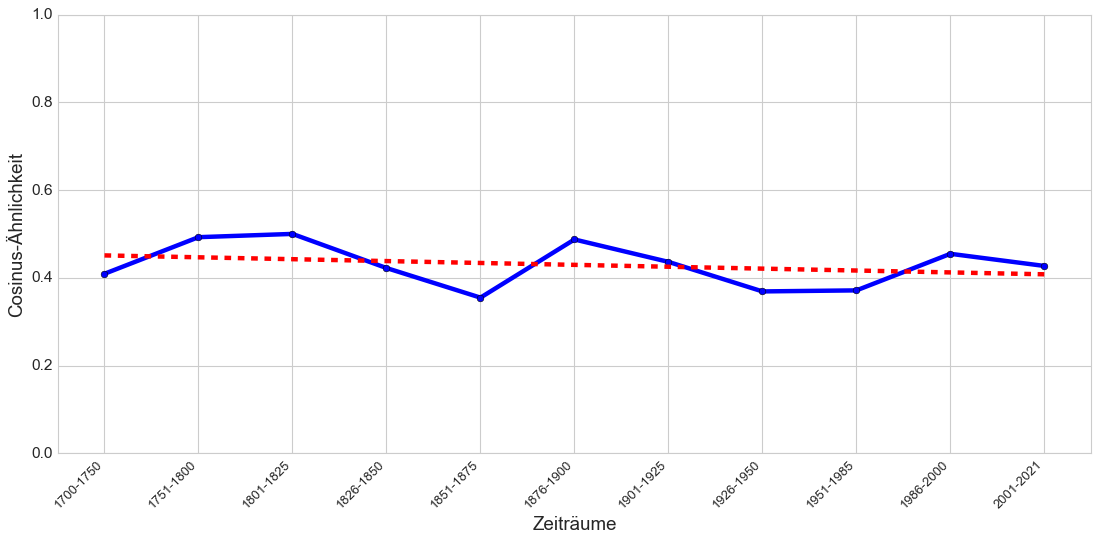

In [66]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [67]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [68]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

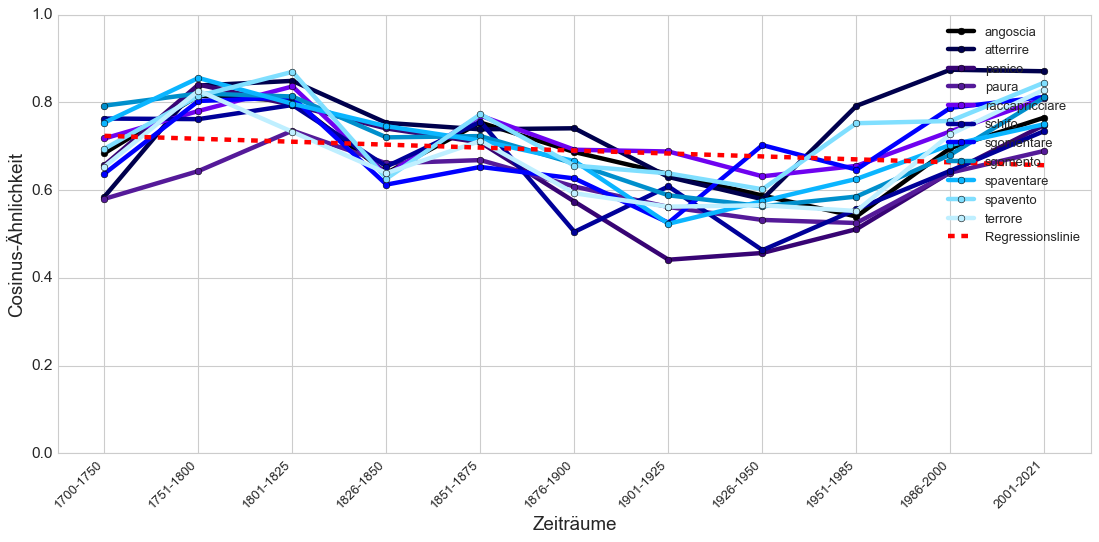

In [69]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

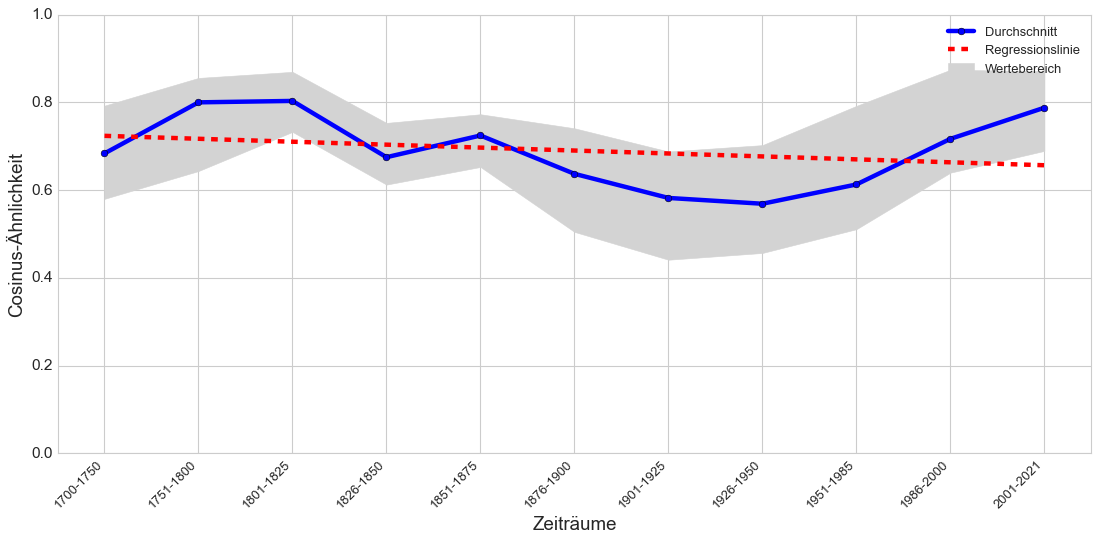

In [70]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [71]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(fermossi, 0.9393776655197144)","(adducean, 0.9851850271224976)","(tempestò, 0.9868941903114319)","(distratto, 0.9903699159622192)","(dirotta, 0.9756138324737549)","(invaso, 0.9342796206474304)","(martellare, 0.8640283942222595)","(smorto, 0.8641918897628784)","(sofisticato, 0.8848681449890137)","(mostruosamente, 0.9321308732032776)","(crudo, 0.893684983253479)"
1,"(adí, 0.937232255935669)","(festeggiar, 0.9833477735519409)","(solitudini, 0.9867981672286987)","(canapo, 0.990069568157196)","(pignatta, 0.9724804759025574)","(arretrare, 0.9331851005554199)","(violentemente, 0.8466649055480957)","(ardire, 0.8421453237533569)","(adolescente, 0.8786805272102356)","(depressione, 0.9068348407745361)","(scimmia, 0.8936226963996887)"
2,"(sivan, 0.9344597458839417)","(tolgonle, 0.9832844138145447)","(setine, 0.9859326481819153)","(insubordinati, 0.98992919921875)","(tagliente, 0.9724562168121338)","(irrigidire, 0.9324346780776978)","(dilatare, 0.8413546085357666)","(scrutare, 0.8395930528640747)","(taciturno, 0.8770443797111511)","(insopportabile, 0.901323676109314)","(robusto, 0.8891704678535461)"
3,"(diciottesimo, 0.9320833086967468)","(spiche, 0.9827868938446045)","(preparansi, 0.9856005907058716)","(paresser, 0.9898038506507874)","(scostandolo, 0.9719969630241394)","(arso, 0.9314802289009094)","(tempia, 0.8389981389045715)","(pallore, 0.8394875526428223)","(immoto, 0.8765576481819153)","(vistoso, 0.8896570801734924)","(taglia, 0.8885530233383179)"
4,"(sacrilega, 0.9320594072341919)","(iperboreo, 0.9820751547813416)","(rovesciate, 0.9855014085769653)","(comprese, 0.9897538423538208)","(bravaccio, 0.9714182019233704)","(anelante, 0.9307808876037598)","(muscolo, 0.8339191675186157)","(ansare, 0.8373886346817017)","(indifeso, 0.8652136325836182)","(incredibilmente, 0.8881383538246155)","(profondità, 0.8870074152946472)"
5,"(cades, 0.9309852719306946)","(fischiar, 0.9819945693016052)","(galleggiano, 0.9851603507995605)","(ritraessero, 0.9895821809768677)","(impiastricciati, 0.9713914394378662)","(indescrivibile, 0.930606484413147)","(anelito, 0.8301063776016235)","(scarno, 0.8354226350784302)","(sperduto, 0.8615357279777527)","(depresso, 0.8875007033348083)","(talmente, 0.8807235360145569)"
6,"(equinozio, 0.930560827255249)","(forier, 0.9818024635314941)","(intelvi, 0.9851140379905701)","(onniscienza, 0.9894896149635315)","(saltarmi, 0.9712390303611755)","(balen, 0.9305379986763)","(viscere, 0.8282973170280457)","(mascella, 0.8297703862190247)","(straordinariamente, 0.8588124513626099)","(proporzione, 0.8866957426071167)","(leggermente, 0.8807138800621033)"
7,"(diecisette, 0.9295088052749634)","(ovile, 0.9817829728126526)","(toccan, 0.984501838684082)","(justiza, 0.988877534866333)","(stridore, 0.9709991216659546)","(opprimente, 0.9301837682723999)","(percossa, 0.8277661204338074)","(tremito, 0.8244933485984802)","(fisicamente, 0.8586317896842957)","(sprofondare, 0.8849396109580994)","(tremendamente, 0.8798865675926208)"
8,"(solstizio, 0.9276070594787598)","(gridi, 0.9817827343940735)","(stampano, 0.9843659996986389)","(attutire, 0.9888160824775696)","(abbrancare, 0.970788836479187)","(dirotto, 0.929823100566864)","(ruggiva, 0.8256803750991821)","(ghigno, 0.8210654258728027)","(metodico, 0.8581475615501404)","(acido, 0.8831784725189209)","(oceano, 0.8782972693443298)"
9,"(nisan, 0.9274618029594421)","(lalma, 0.9817181825637817)","(piombi, 0.9840638041496277)","(cemeterii, 0.9887758493423462)","(sudata, 0.9704968333244324)","(perennemente, 0.9296167492866516)","(prodigioso, 0.8239713311195374)","(scossa, 0.8210081458091736)","(scheletro, 0.857780933380127)","(precoce, 0.8787167072296143)","(pianeta, 0.8782500624656677)"


In [72]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.45392918586730957,
 '1751-1800': 0.526439905166626,
 '1801-1825': 0.4598647952079773,
 '1826-1850': 0.55281662940979,
 '1851-1875': 0.4977080523967743,
 '1876-1900': 0.48532989621162415,
 '1901-1925': 0.437214732170105,
 '1926-1950': 0.373910129070282,
 '1951-1985': 0.5482444763183594,
 '1986-2000': 0.6619912385940552,
 '2001-2021': 0.7072753310203552}

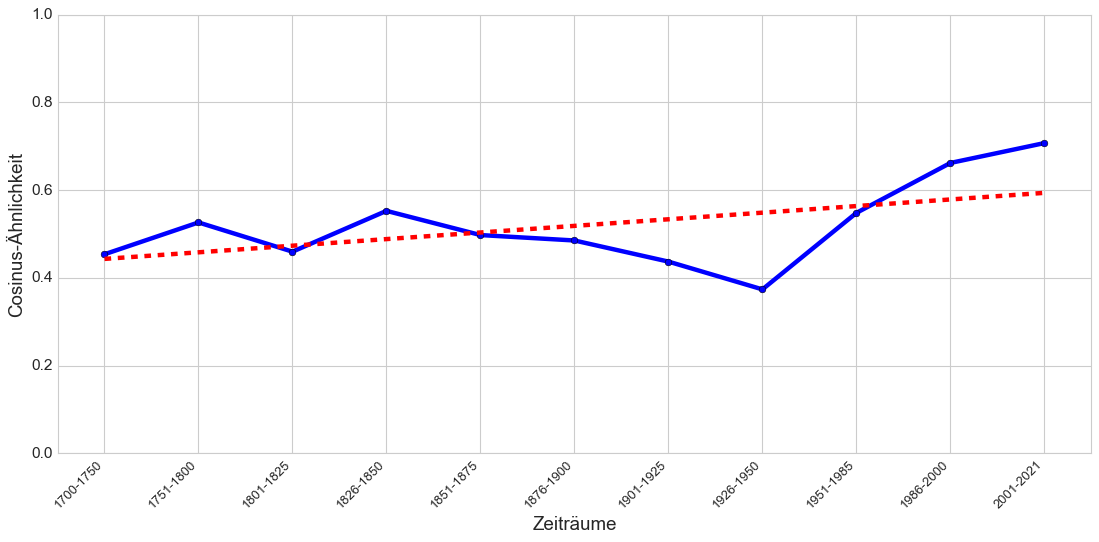

In [73]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [74]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [75]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

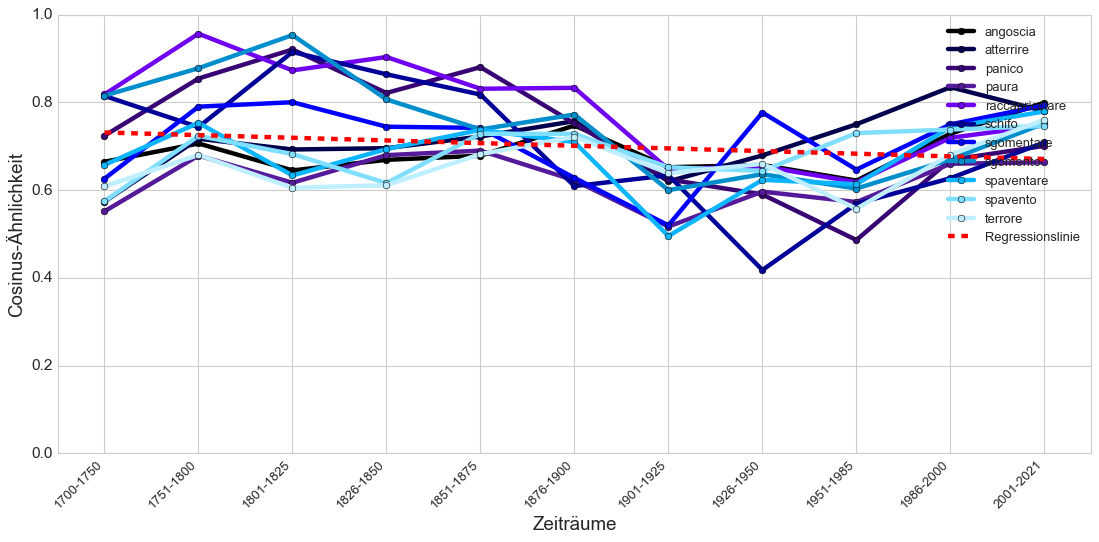

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

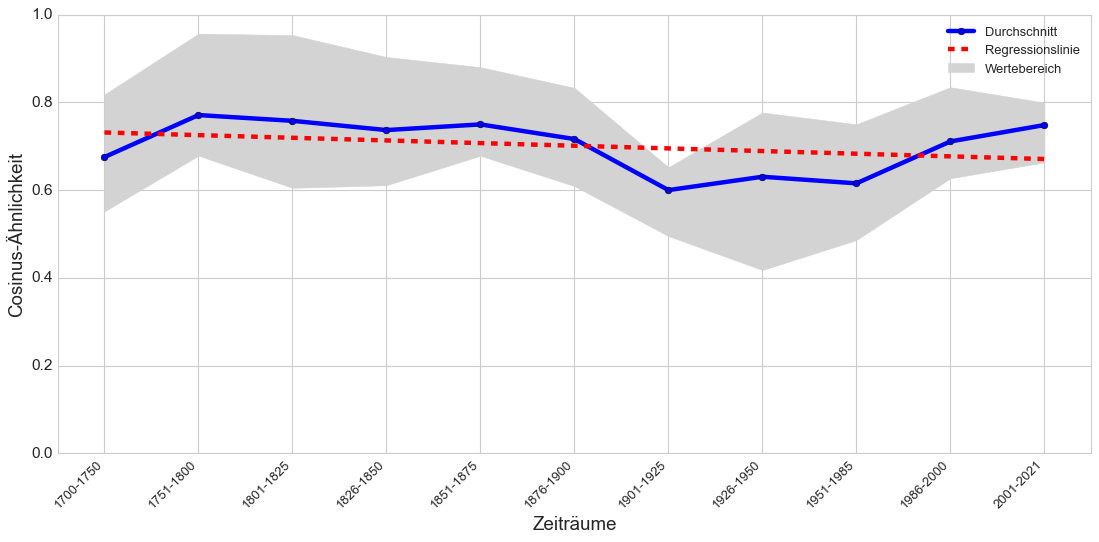

In [77]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [78]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(impreso, 0.9626749753952026)","(messaggero, 0.940998375415802)","(impenetrabile, 0.952864408493042)","(rattenere, 0.9402139186859131)","(convulsione, 0.9287850856781006)","(allentare, 0.8775429129600525)","(irriconoscibile, 0.8166401982307434)","(crudele, 0.796225905418396)","(nervo, 0.8416158556938171)","(tremendamente, 0.9015650749206543)","(tremendamente, 0.9384716749191284)"
1,"(sangermano, 0.9544370174407959)","(astringe, 0.9374127984046936)","(lente, 0.9523503184318542)","(dimenare, 0.938408613204956)","(dolorosamente, 0.9195732474327087)","(ambascia, 0.876924455165863)","(sussulto, 0.8154566287994385)","(gelosia, 0.7944923639297485)","(truculento, 0.8295191526412964)","(istintivo, 0.8881533145904541)","(ambiguo, 0.9302541017532349)"
2,"(legnago, 0.9542156457901001)","(altoum, 0.9370612502098083)","(carnivoro, 0.9513012766838074)","(brandire, 0.9353747367858887)","(involontario, 0.9150291681289673)","(tergere, 0.8746342658996582)","(sofferente, 0.8140231966972351)","(incomposto, 0.7754390239715576)","(fragile, 0.8151668310165405)","(stanchezza, 0.8879866600036621)","(confondere, 0.9266750812530518)"
3,"(peschiera, 0.9537970423698425)","(divorzio, 0.9367027878761292)","(insensibilmente, 0.9505413770675659)","(stocco, 0.9307456016540527)","(subitaneo, 0.9129478931427002)","(accigliato, 0.8745868802070618)","(eppur, 0.8115977644920349)","(straziare, 0.7714203000068665)","(improvvisatore, 0.8145300149917603)","(noia, 0.8829880952835083)","(angosciante, 0.9261733293533325)"
4,"(gant, 0.9533286690711975)","(proclamare, 0.9346103668212891)","(colorire, 0.9497894048690796)","(brescianino, 0.9306870698928833)","(immobilità, 0.9098591804504395)","(arretrare, 0.8741233348846436)","(sconvolgere, 0.8084591031074524)","(innocenza, 0.7598549127578735)","(ferrini, 0.814159095287323)","(esagerato, 0.8810674548149109)","(apparenza, 0.9196568131446838)"
5,"(spilamberto, 0.9532216787338257)","(brevi, 0.9319419264793396)","(lidea, 0.9491671323776245)","(visiera, 0.930011510848999)","(sussulto, 0.9071916341781616)","(parossismo, 0.8740938901901245)","(atroce, 0.8081761002540588)","(orribilmente, 0.7597750425338745)","(sciupare, 0.8135901093482971)","(stomaco, 0.878807008266449)","(impotenza, 0.9189837574958801)"
6,"(terni, 0.951753556728363)","(rotti, 0.9314302206039429)","(rischiarare, 0.9480648636817932)","(furibondo, 0.9288337826728821)","(frenare, 0.9050042033195496)","(sbigottimento, 0.8716747760772705)","(repentino, 0.8077781200408936)","(pietoso, 0.7580165863037109)","(mania, 0.812943160533905)","(dolente, 0.8767853379249573)","(comprensibile, 0.9177131056785583)"
7,"(sboccatura, 0.9508448243141174)","(telefo, 0.9304925799369812)","(immensit, 0.947658360004425)","(tentennare, 0.9254503846168518)","(istupidire, 0.9041508436203003)","(destarsi, 0.8708850741386414)","(fiero, 0.8070769906044006)","(incutere, 0.7571951150894165)","(neppur, 0.8120428323745728)","(alieno, 0.8761768341064453)","(stereotipo, 0.9176596403121948)"
8,"(cannoniere, 0.9507037997245789)","(leggila, 0.9303569197654724)","(fragile, 0.9470048546791077)","(ferir, 0.924858808517456)","(brusco, 0.9035388827323914)","(disfatta, 0.8705968856811523)","(sovrumano, 0.8063710927963257)","(scaltro, 0.7539928555488586)","(aggressivo, 0.8091886639595032)","(inquieto, 0.8751375079154968)","(crudele, 0.916752815246582)"
9,"(gallispane, 0.9506339430809021)","(tigellino, 0.9299359321594238)","(vibrato, 0.9468955397605896)","(lordo, 0.9245691299438477)","(straziante, 0.9024070501327515)","(immobilizzare, 0.8705092072486877)","(palpitante, 0.8024045825004578)","(malvagio, 0.7528906464576721)","(noioso, 0.8091837167739868)","(agio, 0.8740202188491821)","(ignoranza, 0.9161155223846436)"


In [79]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.4182370901107788,
 '1751-1800': 0.5578163862228394,
 '1801-1825': 0.623319685459137,
 '1826-1850': 0.48819881677627563,
 '1851-1875': 0.5405084490776062,
 '1876-1900': 0.5249263644218445,
 '1901-1925': 0.561654806137085,
 '1926-1950': 0.4731641411781311,
 '1951-1985': 0.6012619137763977,
 '1986-2000': 0.6996939182281494,
 '2001-2021': 0.6575104594230652}

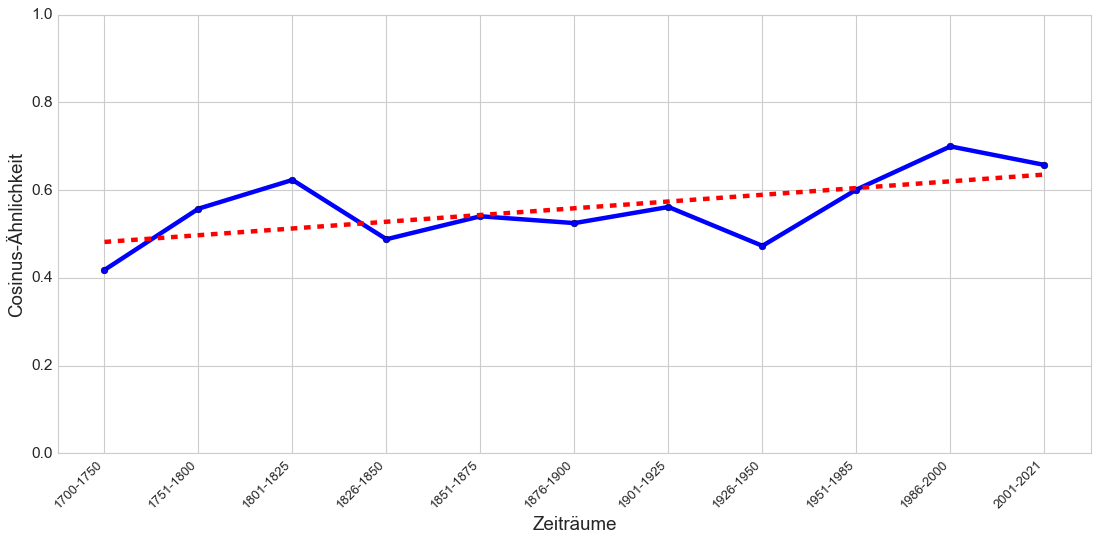

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')


plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

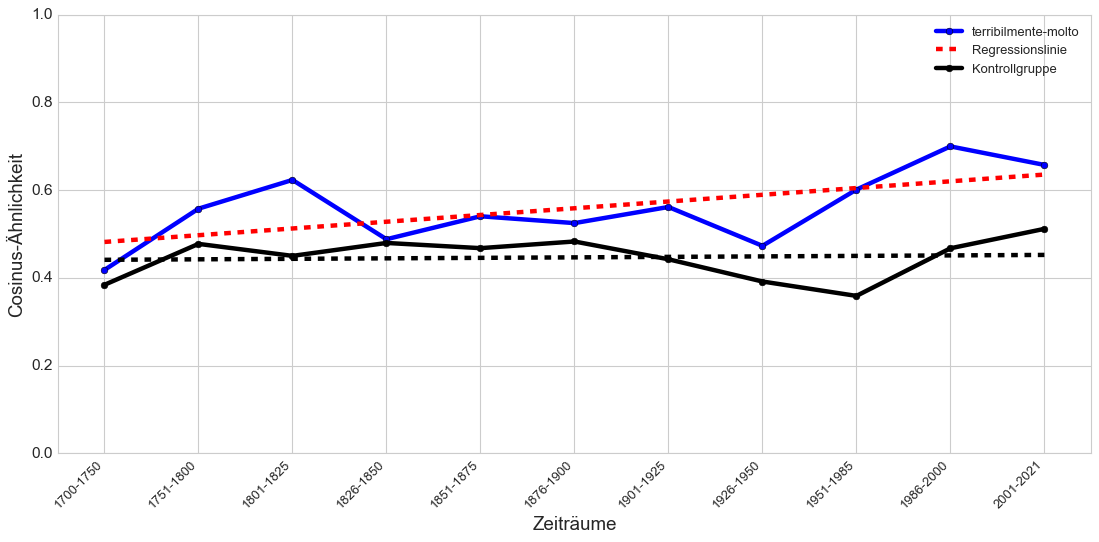

In [81]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [82]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [83]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

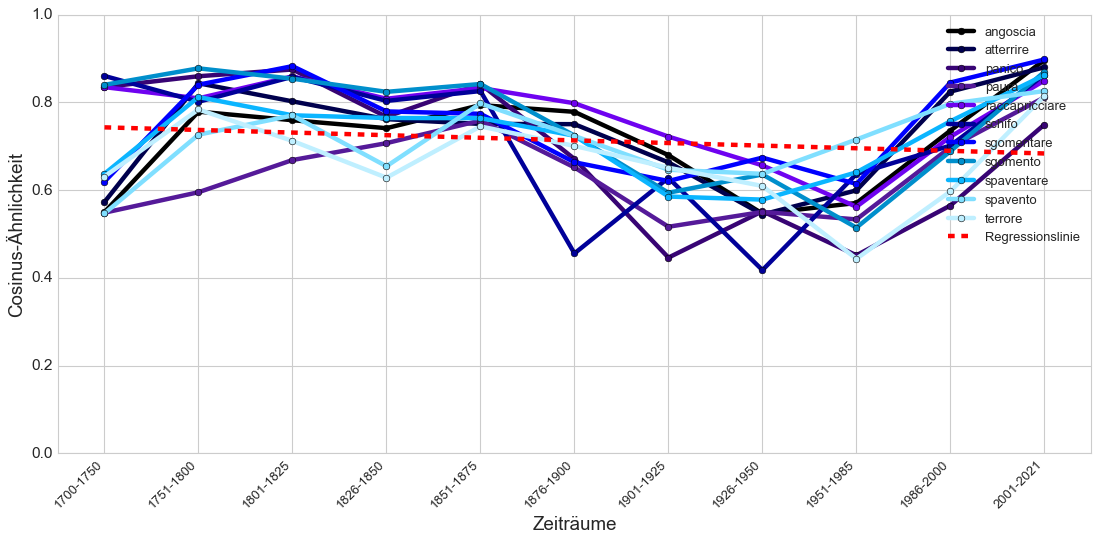

In [96]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

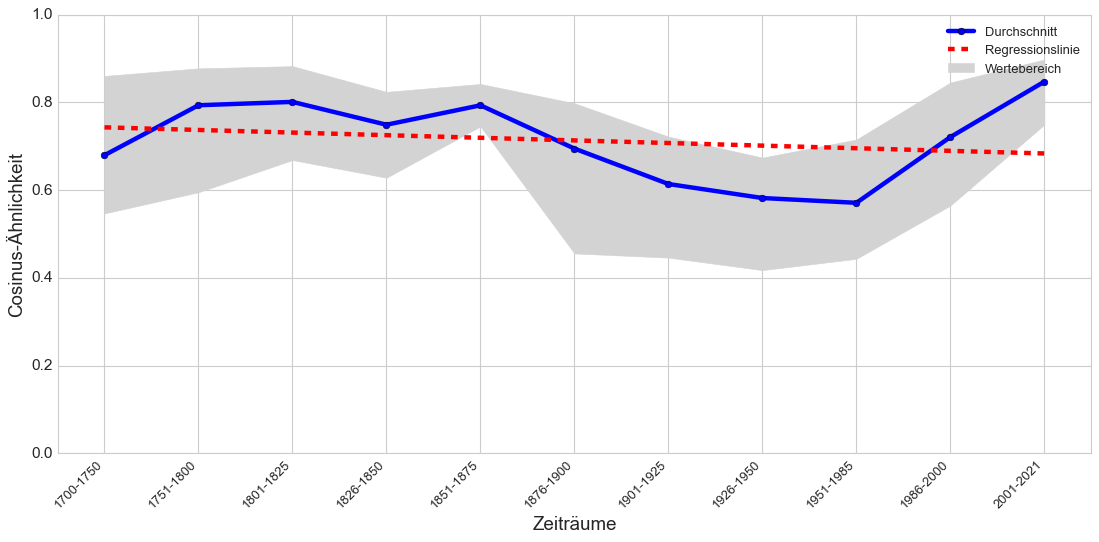

In [85]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [86]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,"(arandole, 0.9892436861991882)",not in vocab,"(pulsazione, 0.9530898332595825)","(commiserazione, 0.9194620847702026)","(repugnanza, 0.9339419603347778)","(nausea, 0.9203268885612488)","(scontato, 0.90265953540802)","(terribilmente, 0.9015650153160095)","(terribilmente, 0.9384717345237732)"
1,not in vocab,not in vocab,"(frangean, 0.9890932440757751)",not in vocab,"(rantolo, 0.9429829716682434)","(sconvolto, 0.9146611094474792)","(sottentrare, 0.9335915446281433)","(incutere, 0.9060998558998108)","(logorio, 0.8930197954177856)","(esagerato, 0.8945418000221252)","(mostruosamente, 0.9207632541656494)"
2,not in vocab,not in vocab,"(agitandosi, 0.9890406727790833)",not in vocab,"(morso, 0.9425784945487976)","(impuro, 0.9127358198165894)","(oppressione, 0.9335808157920837)","(irrefrenabile, 0.9008219838142395)","(illogico, 0.8928755521774292)","(noioso, 0.8909345865249634)","(talmente, 0.918514609336853)"
3,not in vocab,not in vocab,"(testudini, 0.9889851212501526)",not in vocab,"(infuocato, 0.9396229386329651)","(contrarre, 0.9123207926750183)","(sensualità, 0.9310300350189209)","(indicibile, 0.8976168632507324)","(lodevole, 0.8920629024505615)","(rischioso, 0.889257550239563)","(angosciante, 0.9168083071708679)"
4,not in vocab,not in vocab,"(gttati, 0.9885425567626953)",not in vocab,"(sanguinare, 0.9390408992767334)","(contrazione, 0.911881148815155)","(inenarrabile, 0.9309324622154236)","(incredulo, 0.8969468474388123)","(giustificata, 0.8902484774589539)","(complicare, 0.8874483704566956)","(talvolta, 0.9164919257164001)"
5,not in vocab,not in vocab,"(balteo, 0.9882283210754395)",not in vocab,"(inenarrabile, 0.9375367760658264)","(volutt, 0.9105260372161865)","(superstizioso, 0.929806649684906)","(incosciente, 0.8961675763130188)","(nefasto, 0.8885406255722046)","(noia, 0.8870495557785034)","(crudo, 0.9158799648284912)"
6,not in vocab,not in vocab,"(infranta, 0.9881195425987244)",not in vocab,"(battito, 0.9358917474746704)","(comprimere, 0.9088042974472046)","(addolcire, 0.9287671446800232)","(arretrare, 0.8956647515296936)","(preferibile, 0.887840747833252)","(istintivo, 0.8797441720962524)","(apparenza, 0.9059299826622009)"
7,not in vocab,not in vocab,"(nugoloni, 0.9878276586532593)",not in vocab,"(schiantare, 0.934116005897522)","(sbalordimento, 0.9084644317626953)","(ferocia, 0.928725004196167)","(represso, 0.8953201770782471)","(vittorini, 0.8871560096740723)","(mediocre, 0.8767951130867004)","(confondere, 0.9015152454376221)"
8,not in vocab,not in vocab,"(translata, 0.9874299764633179)",not in vocab,"(rifluire, 0.9326075911521912)","(inestinguibile, 0.9084116816520691)","(repulsione, 0.9282509684562683)","(soccorrere, 0.8934076428413391)","(neutrale, 0.8870406150817871)","(miracoloso, 0.8761447072029114)","(vibrazione, 0.900357186794281)"
9,not in vocab,not in vocab,"(brennero, 0.9874163269996643)",not in vocab,"(puntura, 0.9323951005935669)","(disdegno, 0.9064810276031494)","(lenire, 0.9265041947364807)","(rimordere, 0.8933284878730774)","(reputazione, 0.8869591355323792)","(angosciante, 0.8761265873908997)","(sfumatura, 0.9000330567359924)"


In [87]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.4564633369445801,
 '1851-1875': 0.5203005075454712,
 '1876-1900': 0.5341582894325256,
 '1901-1925': 0.5682231187820435,
 '1926-1950': 0.47838857769966125,
 '1951-1985': 0.5637432932853699,
 '1986-2000': 0.7054338455200195,
 '2001-2021': 0.7042652368545532}

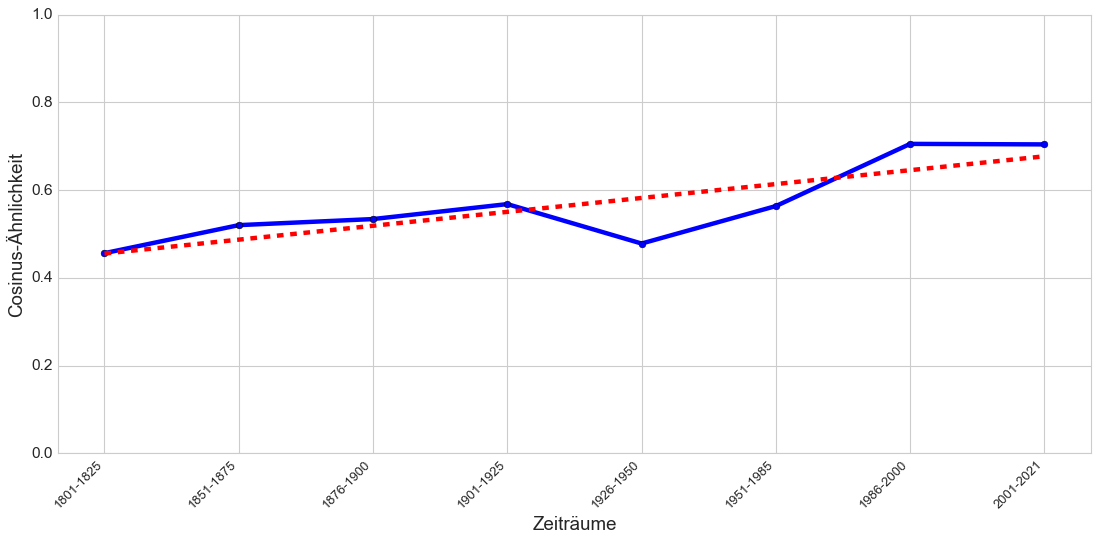

In [88]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [89]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [90]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

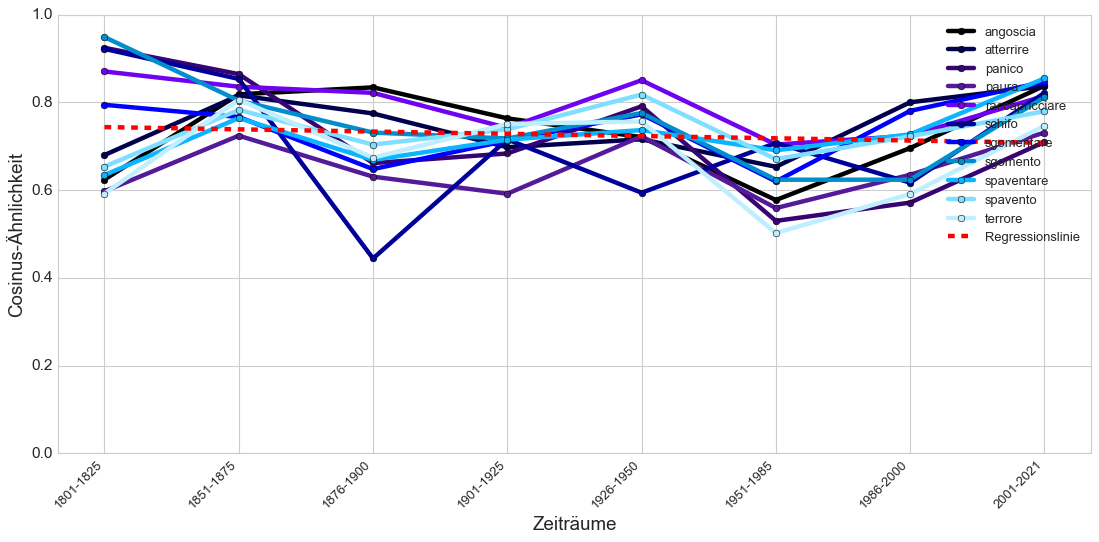

In [91]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

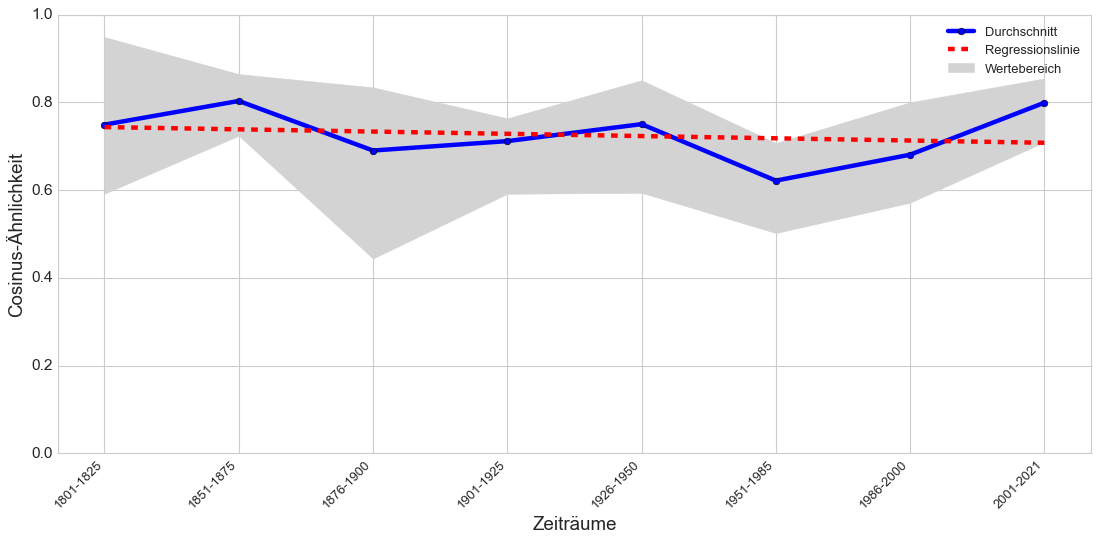

In [92]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()